In [1]:
import mat73
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
file = ''
#load data
data = mat73.loadmat(f'data/Bayesian_JAGS_model_selection_partial_pooling{file}.mat')['samples']
print(np.shape(data['z']))
print(data.keys())
n_chains, n_samples, n_participants = np.shape(data['z'])

(4, 20000, 11)
dict_keys(['eta_i_EE', 'eta_i_EUT', 'mu_eta_EE', 'mu_eta_EUT', 'sigma_eta_EE', 'sigma_eta_EUT', 'z'])


In [ ]:
#investigate eta_g 
#note! no destinqtion between model selection, which will have an effect for posterior distributions

def create_kde_plot(x, y, title):
    plt.figure(figsize=(8, 6))  
    
    sns.kdeplot(x=x, y=y, cmap='viridis', fill=True)
    sns.lineplot(x=[-5, 5], y=[-5, 5], color='red', linestyle='--')
    plt.axvline(0, color='red', alpha=0.5, linestyle='--')
    plt.axhline(1, color='red', alpha=0.5, linestyle='--')
    
    plt.xlim(-5, 5) 
    plt.ylim(-5, 5)  
    
    plt.title(title)
    
    plt.show()

x_ee = data['eta_i_EE'][:,:,:,0].flatten()
y_ee = data['eta_i_EE'][:,:,:,1].flatten()
create_kde_plot(x_ee, y_ee, 'eta_g_EE')

#x_eut = data['eta_i_EUT'][:,:,:,0].flatten()
#y_eut = data['eta_i_EUT'][:,:,:,1].flatten()
#create_kde_plot(x_eut, y_eut, 'eta_g_EUT')


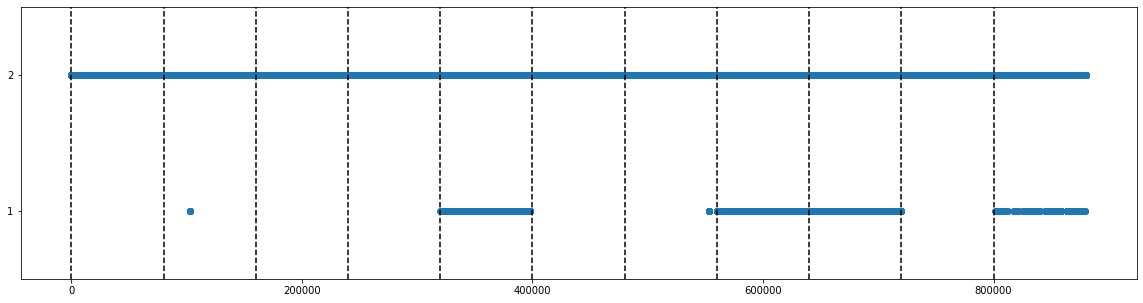

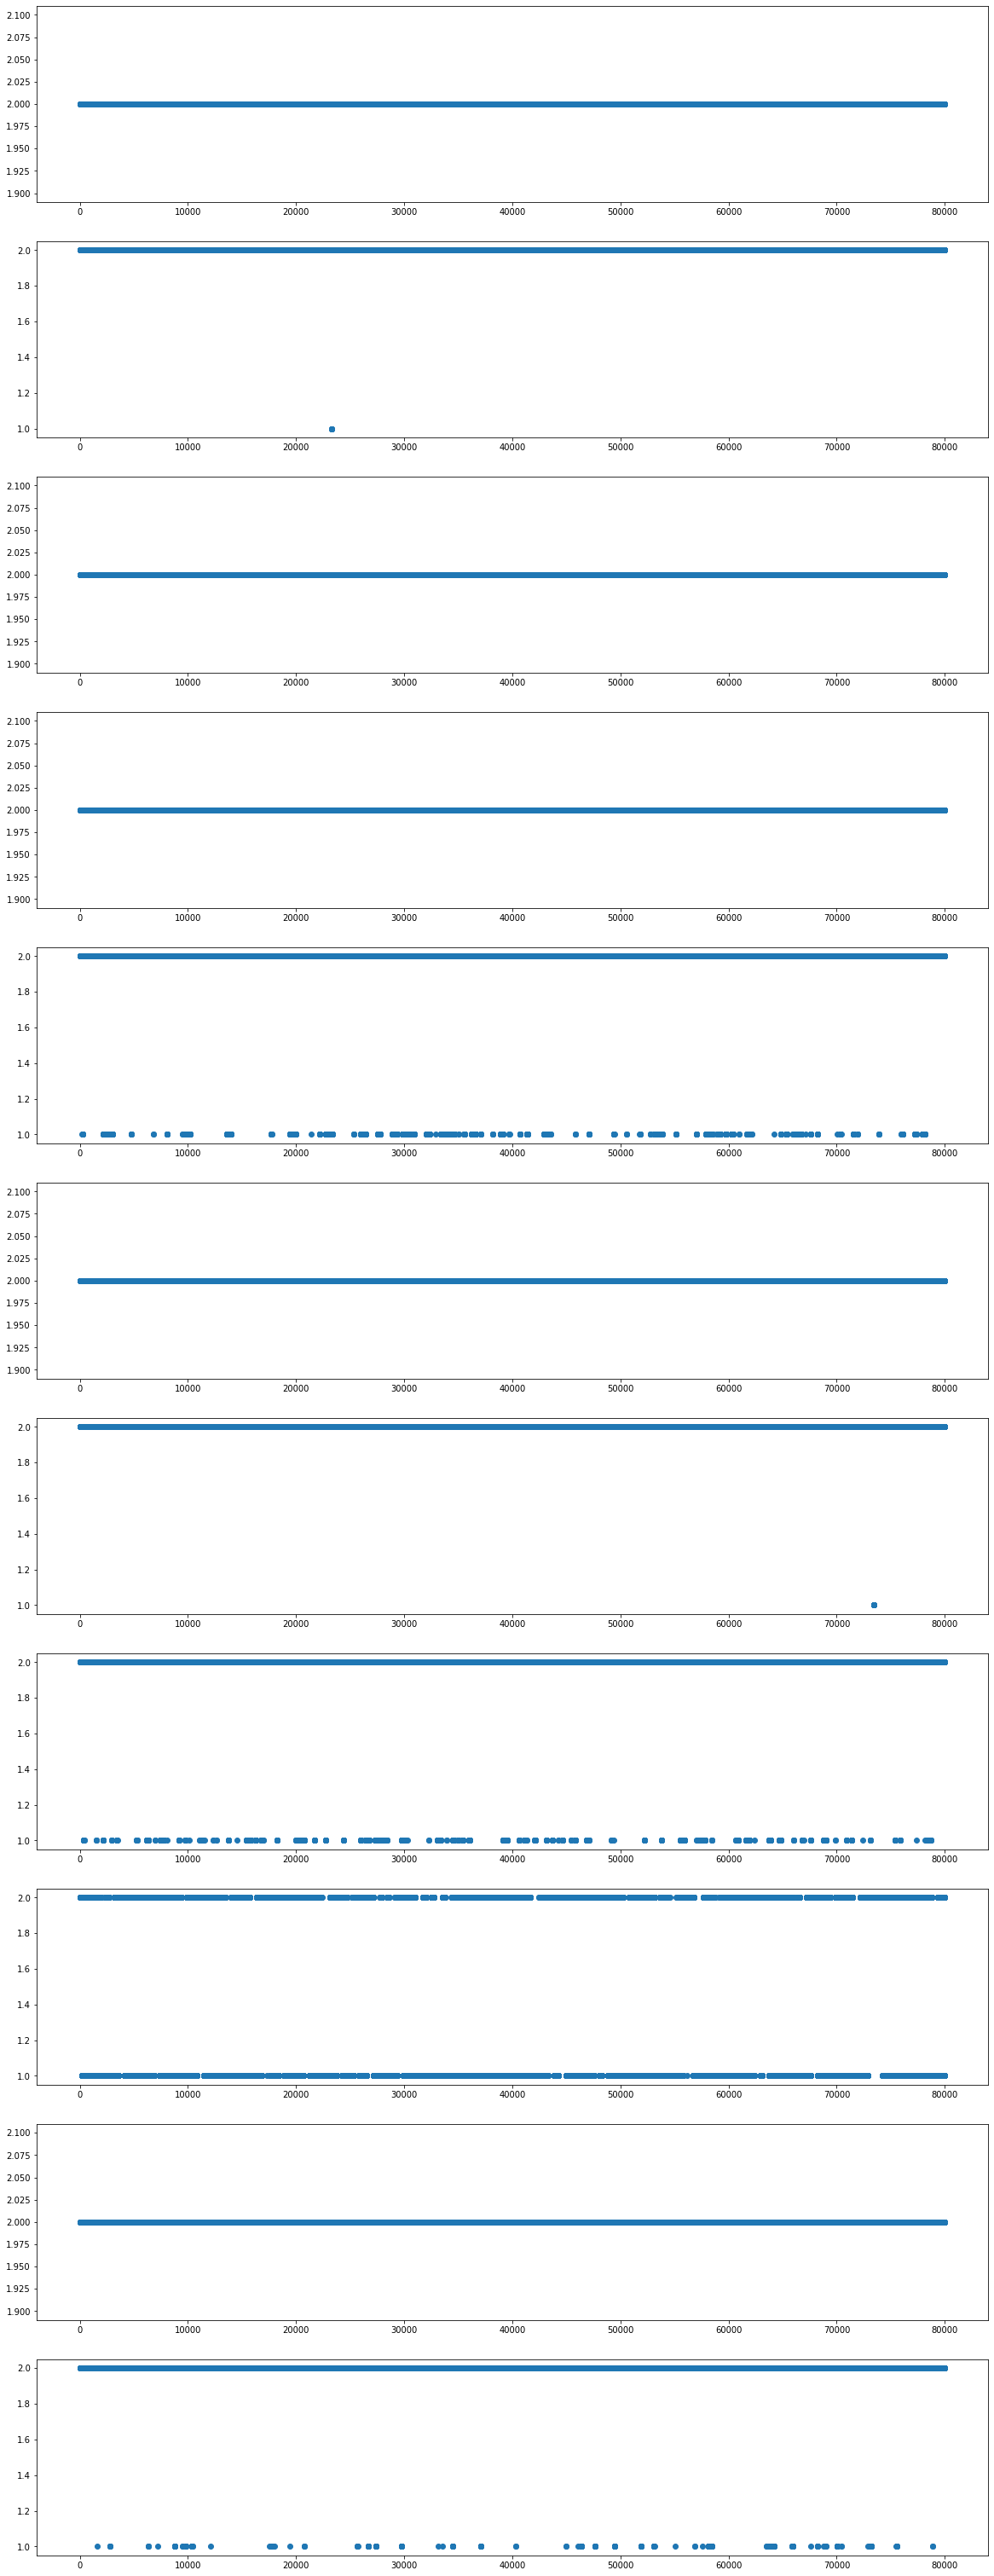

In [11]:
#Investigate model indicator
N_models = 2
#labels = [str(i) for i in range(1, N_models+1)]
z = np.transpose(data['z'], (2, 0, 1))
counts = np.array([list(z.flatten()).count(i) for i in range(1, N_models+1)])

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
#ax[0].bar(labels, counts / sum(counts))
ax.scatter(range(len(z.flatten())), z.flatten())
ax.set_ylim([0.5, 2.5])
ax.set_yticks([1, 2])
[ax.axvline(i * n_chains * n_samples, linestyle='--', color='k') for i in range(n_participants)]
plt.show()

fig, ax = plt.subplots(11,1, figsize=(20, 5*n_participants))
for i in range(n_participants):
    x = z[i,:,:]
    ax[i].scatter(range(len(x.flatten())), x.flatten())
plt.show()


In [ ]:
#investigate aggregated eta_i
eta_EUT = [data['eta_i_EUT'][c, s, i] for c in range(n_chains) for s in range(n_samples) for i in range(n_participants) if data['z'][c, s, i] % 2 != 0]
eta_EE_a = [data['eta_i_EE'][c, s, i][0] for c in range(n_chains) for s in range(n_samples) for i in range(n_participants) if data['z'][c, s, i] % 2 == 0]
eta_EE_m = [data['eta_i_EE'][c, s, i][1] for c in range(n_chains) for s in range(n_samples) for i in range(n_participants) if data['z'][c, s, i] % 2 == 0]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.kdeplot(eta_EUT, ax = ax[0])
ax[0].set_title(f'eta_i_EUT, {int(len(eta_EUT_a) * 100 / sum(counts))} %')
ax[0].set_xlim([-1, 2])

[sns.kdeplot(data, ax=ax[1]) for data in (eta_EE_a, eta_EE_m)]
ax[1].set_title(f'eta_i_EE, {int(len(eta_EE_a) * 100 / sum(counts))} %')
ax[1].set_xlim([-1, 2])
plt.show()


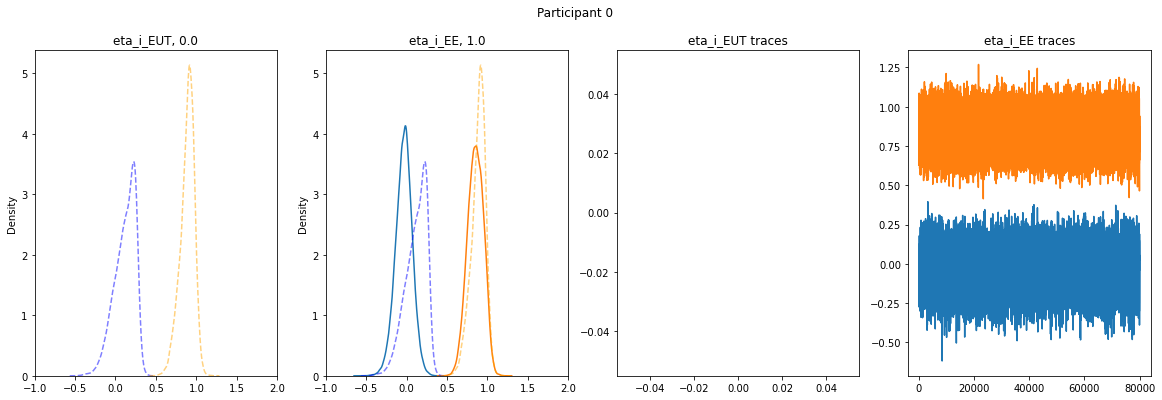

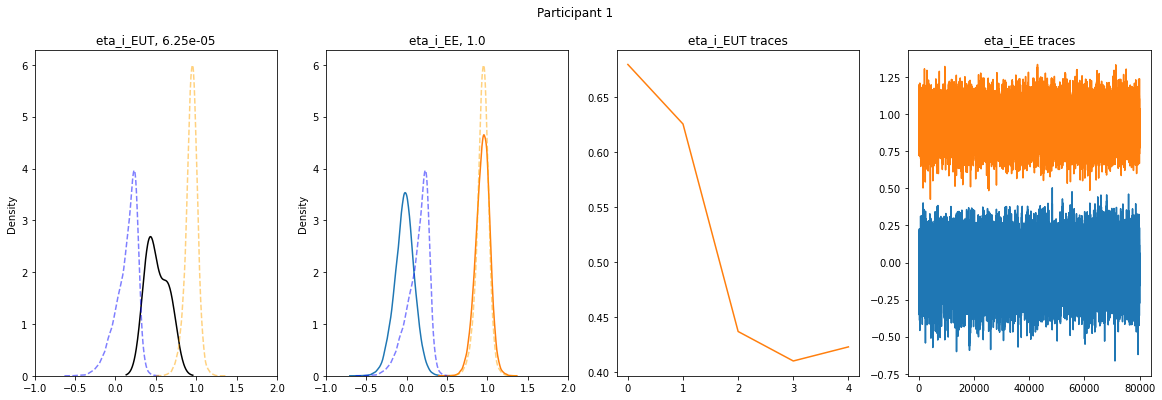

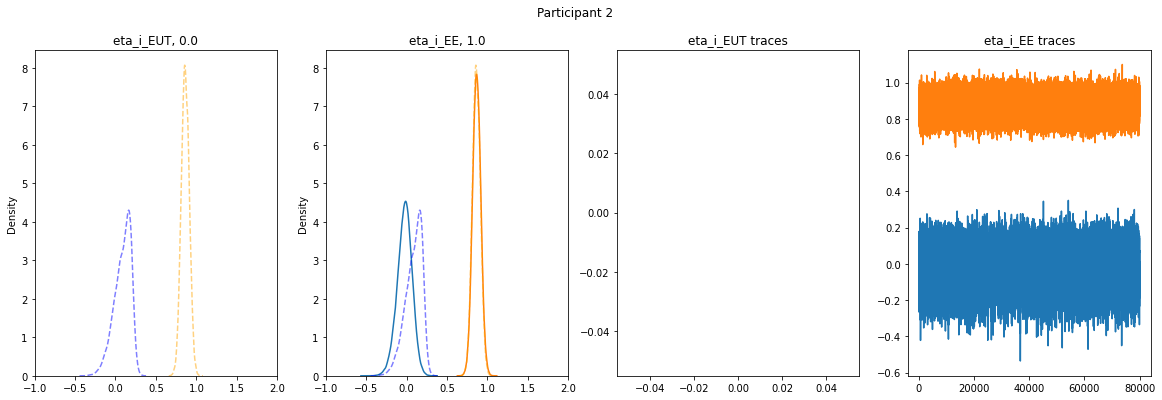

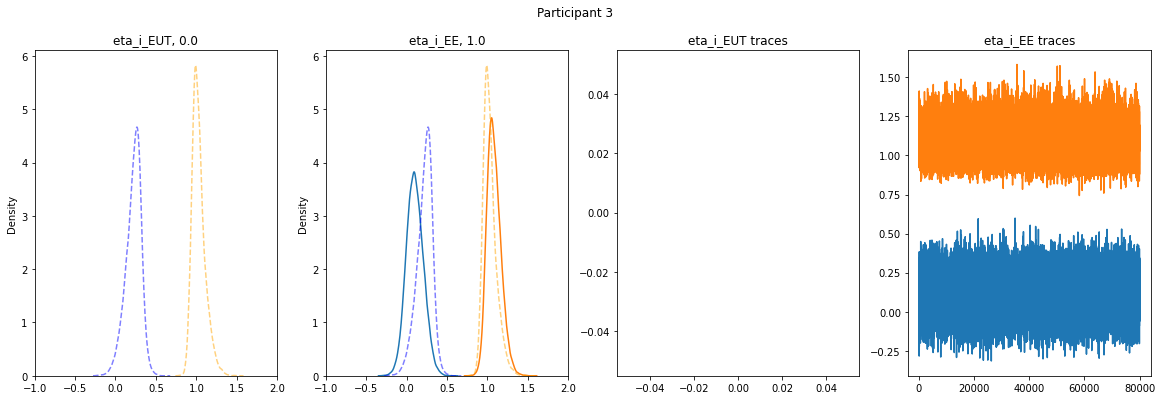

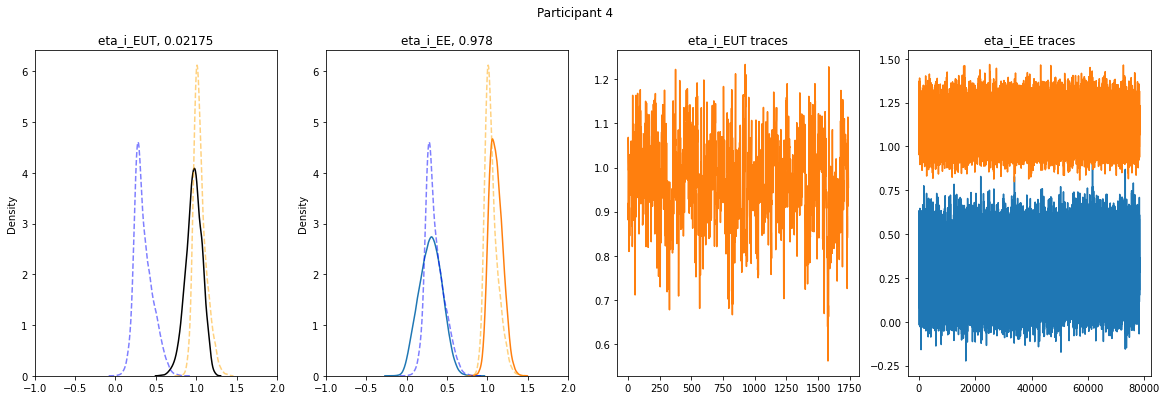

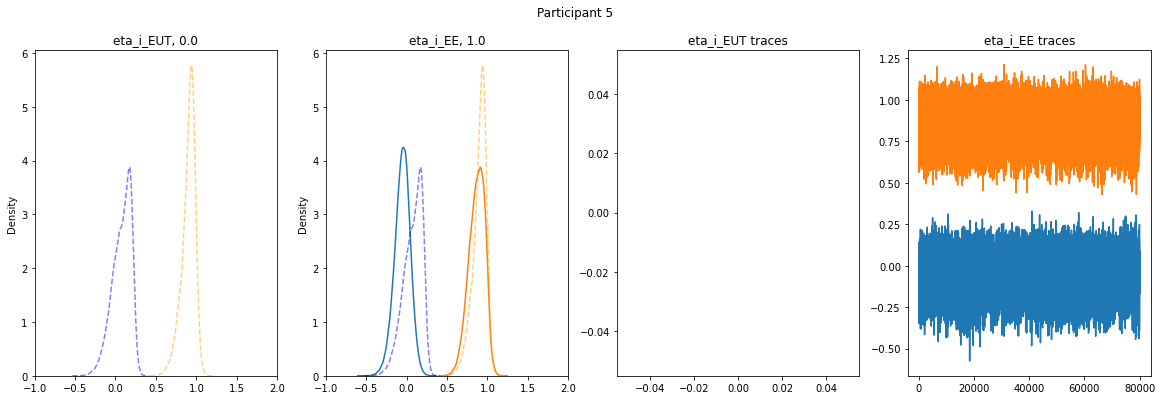

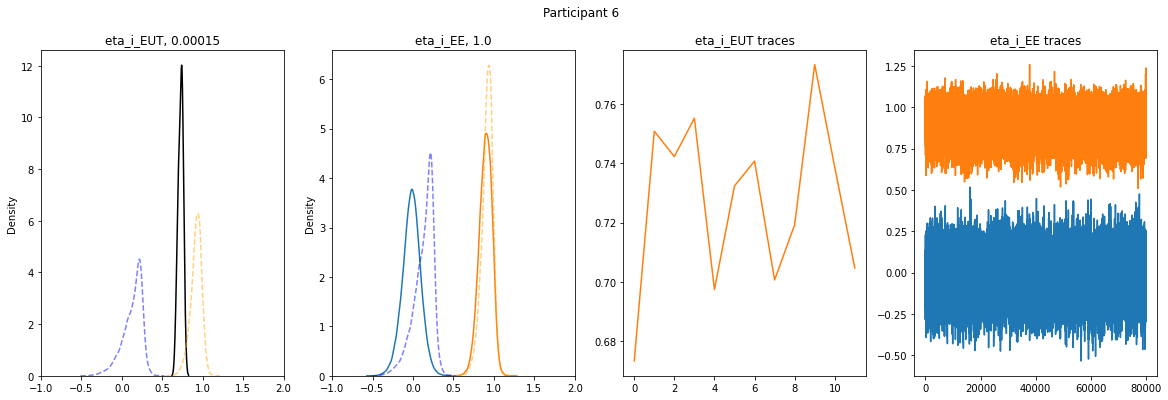

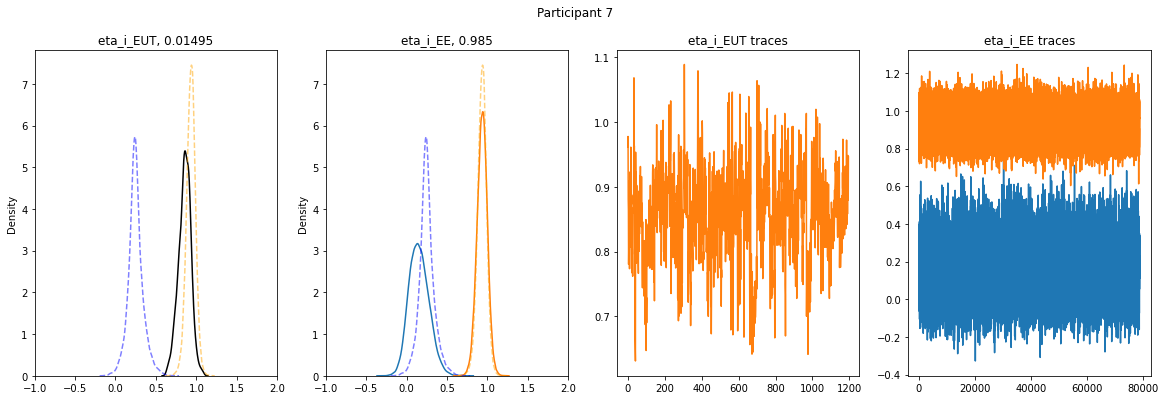

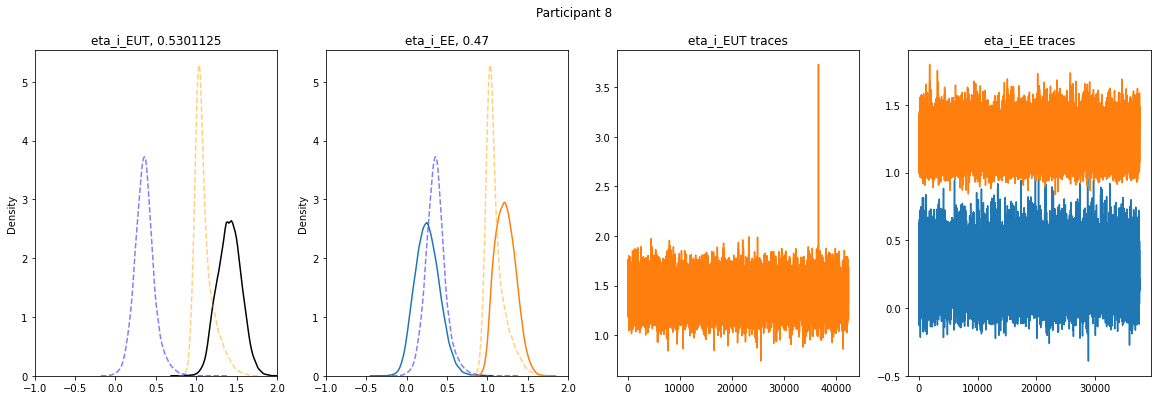

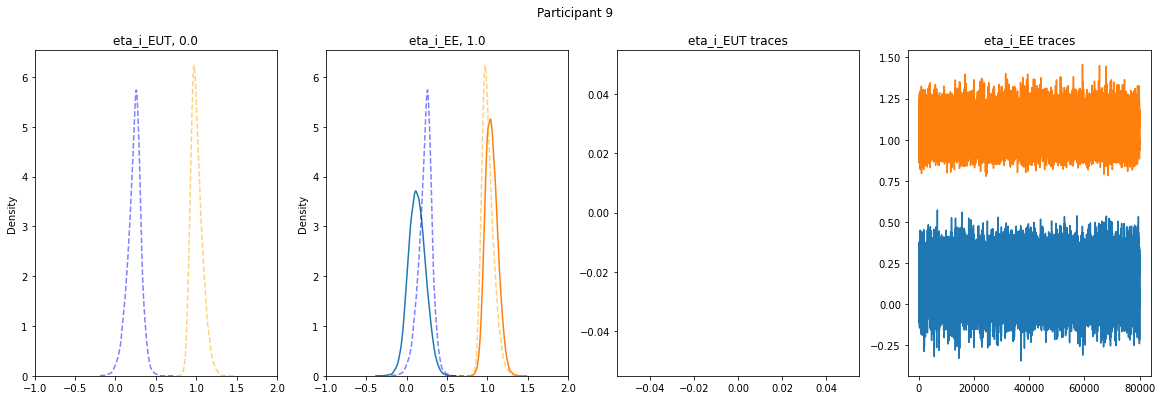

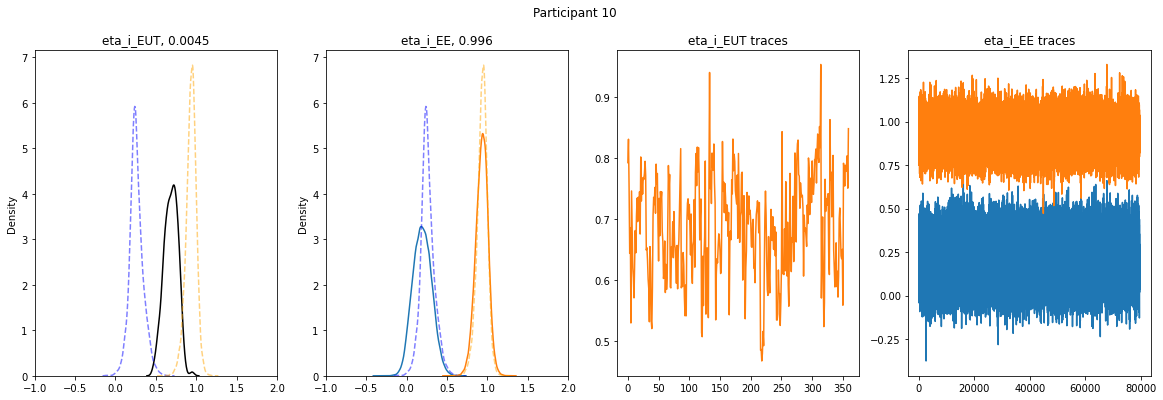

In [19]:
#investigate eta_i on indicitual level
for i in range(n_participants):
    eta_EUT = []
    eta_EUT_m = []
    eta_EE_a = []
    eta_EE_m = []
    for s in range(n_samples):
        for c in range(n_chains):
            z_value = data['z'][c, s, i]
            eta_i_EE_value = data['eta_i_EE'][c, s, i]
            eta_i_EUT_value = data['eta_i_EUT'][c, s, i]
            
            (eta_EUT if z_value % 2 != 0 else eta_EE_a).append(eta_i_EUT_value if z_value % 2 != 0 else eta_i_EE_value[0])
            (eta_EUT_m if z_value % 2 != 0 else eta_EE_m).append(eta_i_EUT_value if z_value % 2 != 0 else eta_i_EE_value[1])
            
    fig, ax = plt.subplots(1, 4, figsize=(20, 6))
    
    sns.kdeplot(data=eta_EUT, ax=ax[0], color = 'black')
    sns.kdeplot(data=est_data['eta_i'][:,:,i,0].flatten(), ax=ax[0], color = 'blue', linestyle = '--', alpha = 0.5)
    sns.kdeplot(data=est_data['eta_i'][:,:,i,1].flatten(), ax=ax[0], color = 'orange', linestyle = '--', alpha = 0.5)
    ax[0].set(title = f'eta_i_EUT, {len(eta_EUT) / (n_samples*n_chains)}', xlim = [-1,2])

    [sns.kdeplot(data=eta, ax=ax[1]) for j, eta in enumerate((eta_EE_a, eta_EE_m))]
    sns.kdeplot(data=est_data['eta_i'][:,:,i,0].flatten(), ax=ax[1], color = 'blue', linestyle = '--', alpha = 0.5)
    sns.kdeplot(data=est_data['eta_i'][:,:,i,1].flatten(), ax=ax[1], color = 'orange', linestyle = '--', alpha = 0.5)
    ax[1].set(title = f'eta_i_EE, {round(len(eta_EE_a) / (n_samples*n_chains), 3)}', xlim = [-1,2])

    [ax[2].plot(range(len(eta)), eta) for eta in (eta_EUT_a, eta_EUT_m)]
    ax[2].set_title('eta_i_EUT traces')

    [ax[3].plot(range(len(eta)), eta) for eta in (eta_EE_a, eta_EE_m)]
    ax[3].set_title('eta_i_EE traces')

    plt.suptitle(f'Participant {i}')
    
    plt.show()



In [2]:
#load data
est_data = mat73.loadmat(f'data/1_pilot/Bayesian_JAGS_parameter_estimation_partial_pooling.mat')['samples']
print(est_data.keys())
n_chains, n_samples, n_participants, n_conditions = np.shape(est_data['eta_i'])
print(n_chains, n_samples, n_participants)

dict_keys(['beta_g', 'beta_i', 'eta_g', 'eta_i', 'mu_eta', 'mu_log_beta', 'sigma_eta', 'sigma_log_beta', 'tau_eta', 'tau_log_beta'])
4 5000 11


11


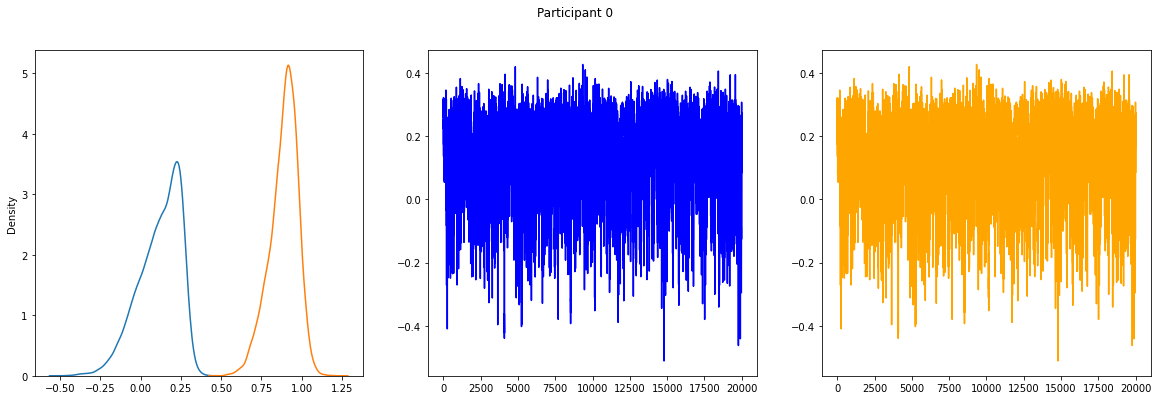

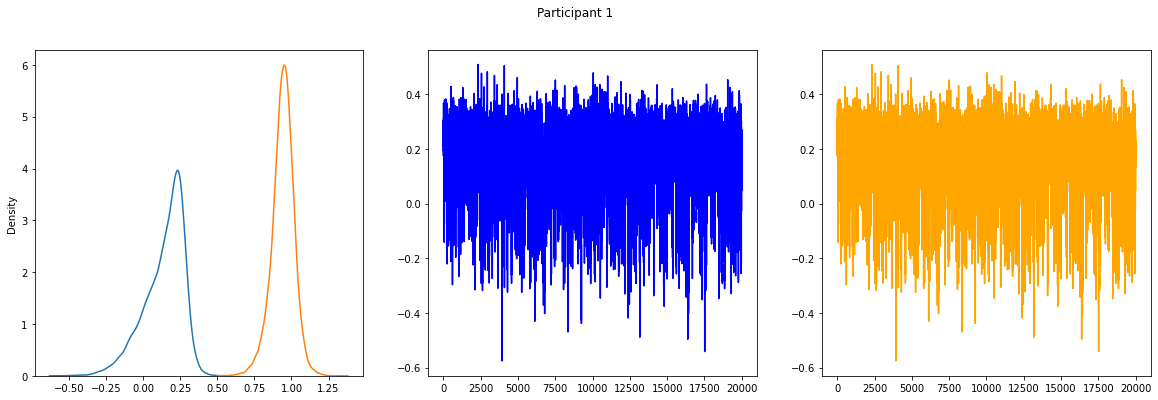

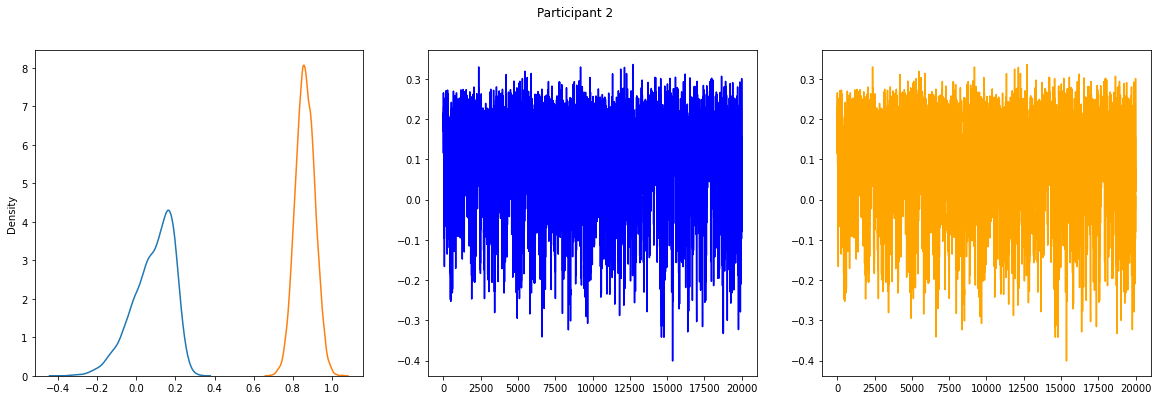

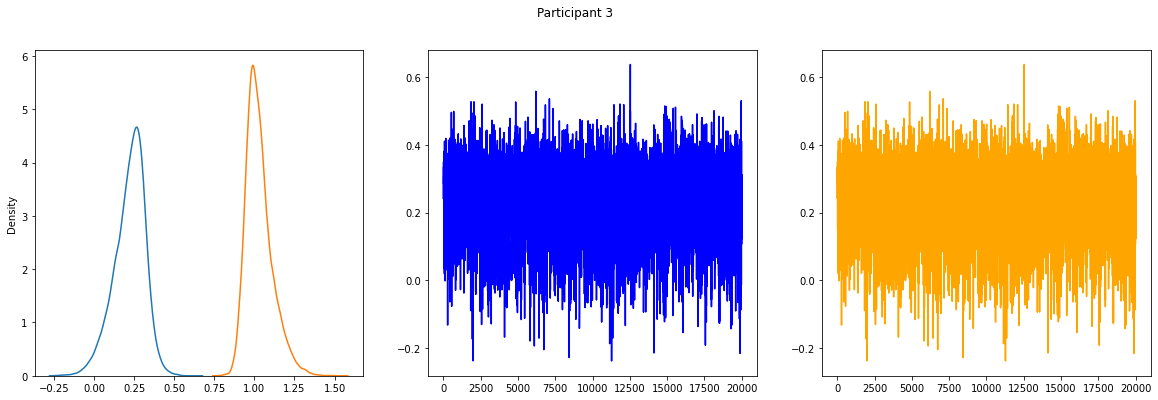

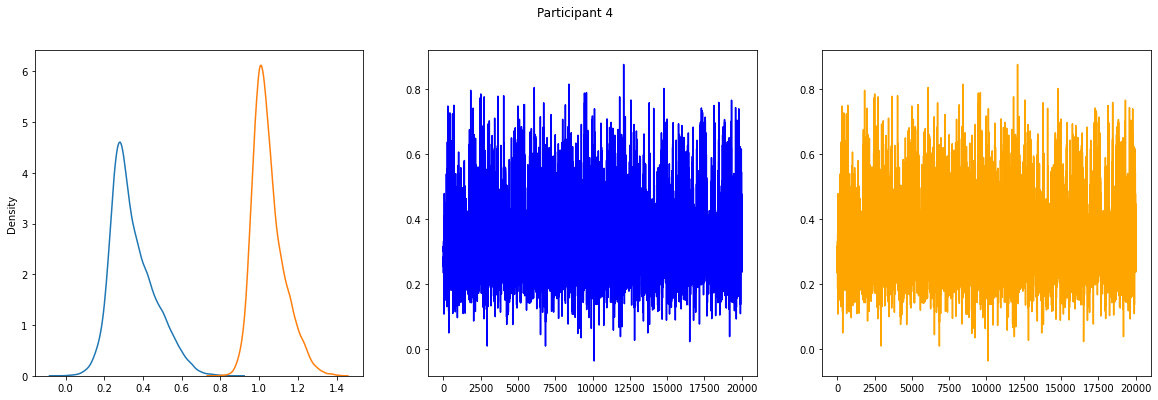

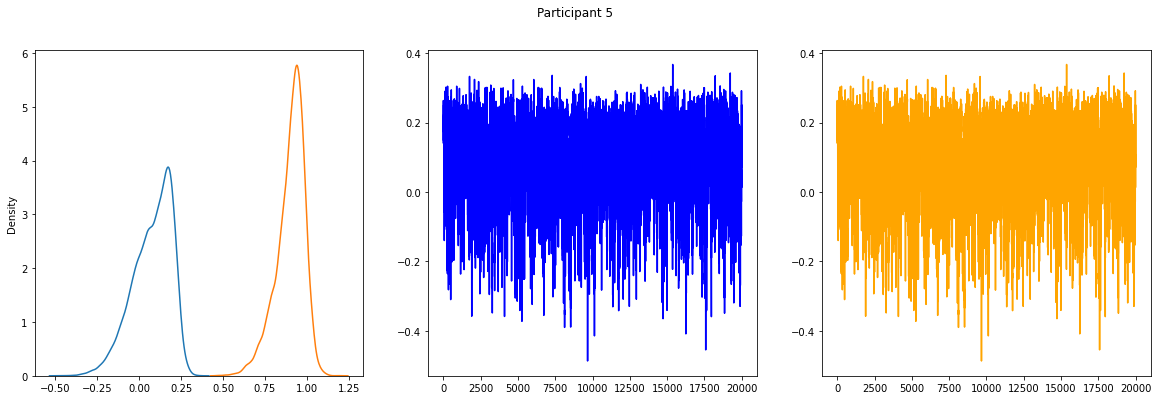

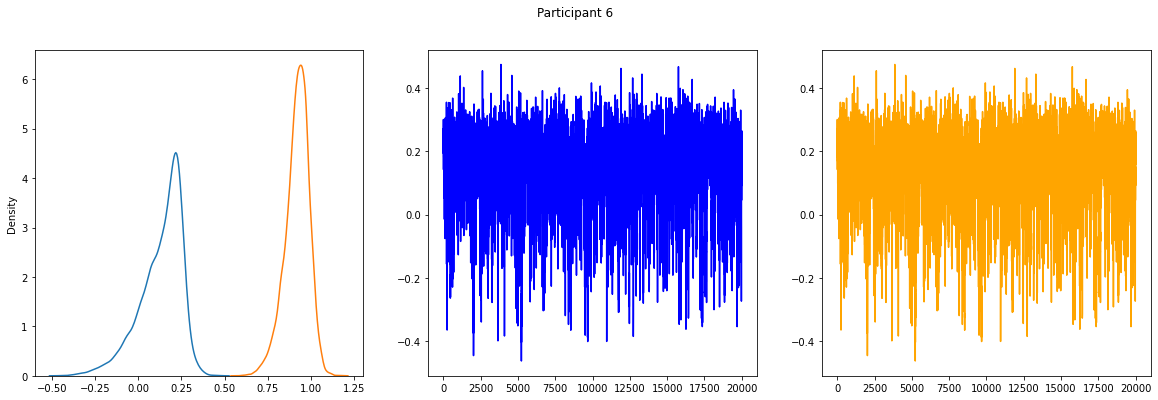

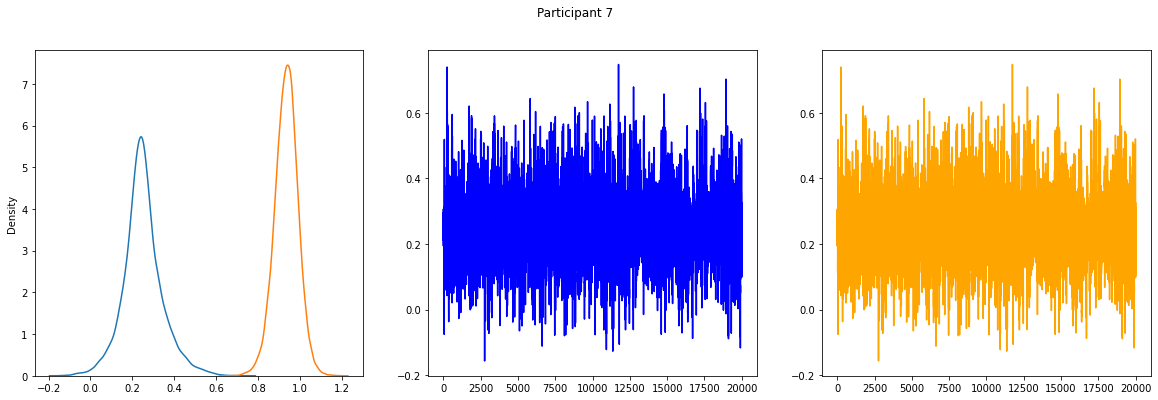

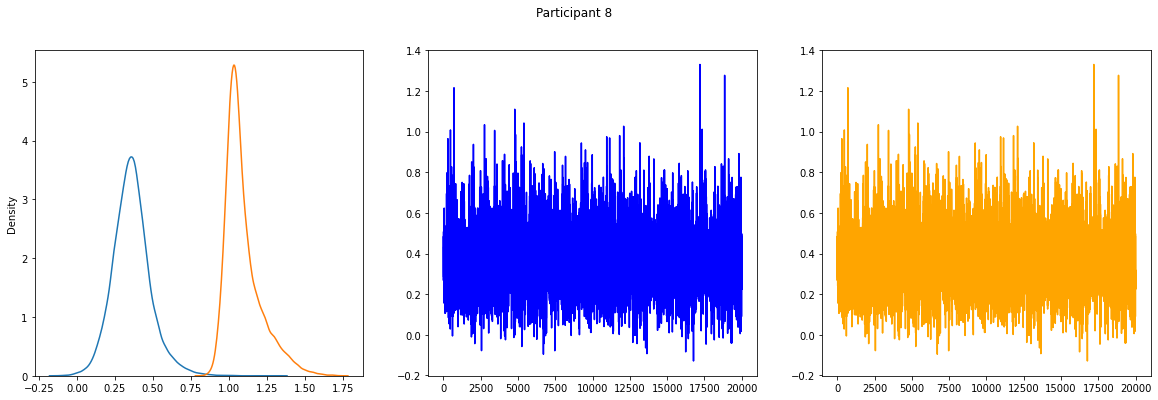

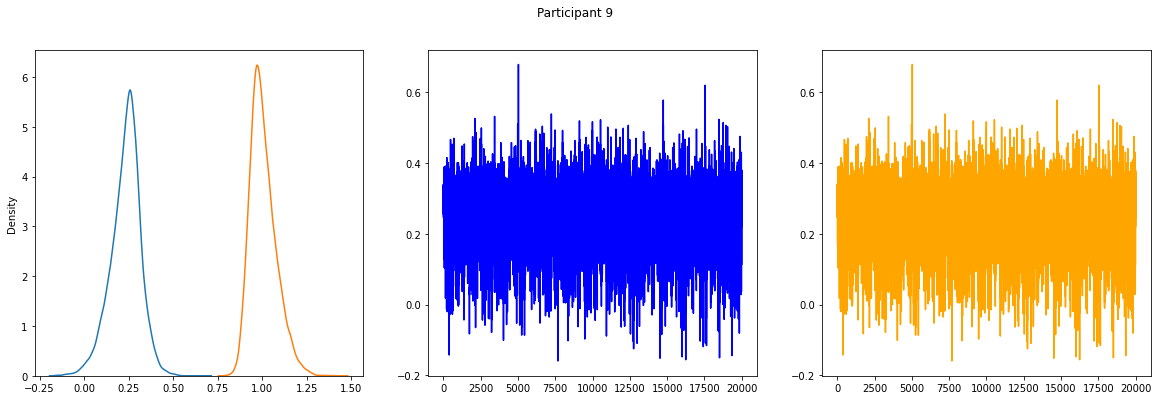

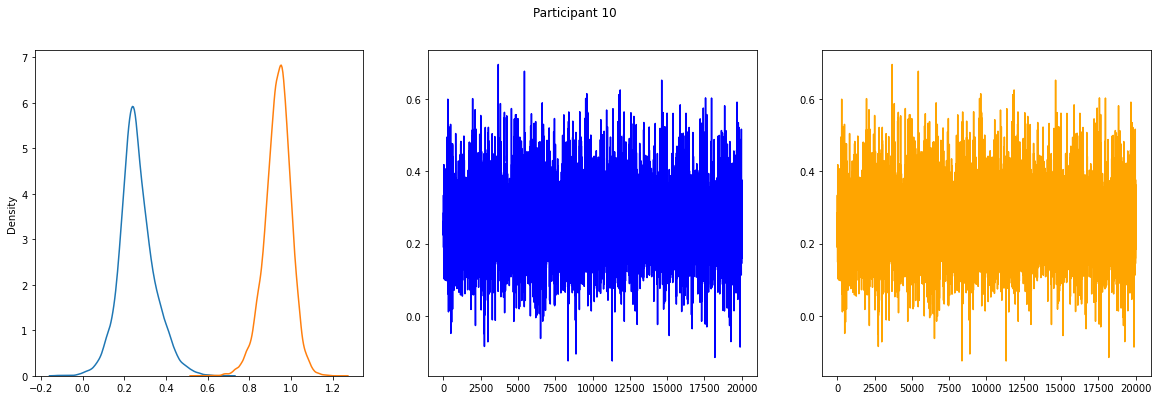

In [7]:
#investigate eta_i on indicitual level
print(n_participants)
for i in range(n_participants):
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))

    sns.kdeplot(data=est_data['eta_i'][:,:,i,0].flatten(), ax=ax[0])
    sns.kdeplot(data=est_data['eta_i'][:,:,i,1].flatten(), ax=ax[0])
    
    ax[1].plot(range(len(est_data['eta_i'][:,:,i,0].flatten())), est_data['eta_i'][:,:,i,0].flatten(), color = 'blue')
    ax[2].plot(range(len(est_data['eta_i'][:,:,i,1].flatten())), est_data['eta_i'][:,:,i,0].flatten(), color = 'orange')

    plt.suptitle(f'Participant {i}')
    
    plt.show()